# Cell 1 - Markdown
"""
# 🧹 Filter Method for Feature Selection

The **filter method** is a feature selection technique that relies on **statistical measures** to score the relevance of each feature **independently of any machine learning model**.

It selects features based on their relationship with the target variable using techniques such as:
- Variance Threshold
- Correlation
- Chi-Square Test
- ANOVA F-test
- Mutual Information

Filter methods are usually used as a **preprocessing step** before model training.
"""

In [1]:
import numpy as np
import pandas as pd 

In [3]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\test.csv\test.csv" ).drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING


In [4]:
df['Activity'].value_counts()

Activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64

In [5]:
print(df.shape)

(2947, 562)


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

In [10]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)

(2357, 561)
(590, 561)


# Applying Logistic Regression

In [13]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9949152542372881


# 1. Removing Duplicate Columns

In [14]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [15]:
duplicate_columns = get_duplicate_columns(X_train)

In [16]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [17]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
2665,-0.986749,-0.986749,-0.986749,-0.986749
2798,-0.990383,-0.990383,-0.990383,-0.990383
456,-0.154926,-0.154926,-0.154926,-0.154926
462,-0.122661,-0.122661,-0.122661,-0.122661
2178,-0.288443,-0.288443,-0.288443,-0.288443
...,...,...,...,...
1638,-0.171726,-0.171726,-0.171726,-0.171726
1095,-0.961457,-0.961457,-0.961457,-0.961457
1130,-0.987166,-0.987166,-0.987166,-0.987166
1294,-0.145778,-0.145778,-0.145778,-0.145778


In [18]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [19]:
print(X_train.shape)
print(X_test.shape)

(2357, 540)
(590, 540)


## 📊 Feature Selection — Variance Threshold

### 🔍 What is Variance?

Variance is a statistical measure of the **spread** of data in a feature. It quantifies how much the values of a feature deviate from the mean:

\[
\text{Variance}(X) = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
\]

A **low-variance feature** has values that are nearly constant across all observations, offering little useful information for prediction tasks.

---

### 🎯 Why Use Variance for Feature Selection?

- To **remove features with low variability**, which likely carry less predictive power.
- To **reduce dimensionality** and improve model training time.
- To **remove noise or redundant features** from the dataset.

---

### ⚙️ How It Works

A **Variance Threshold** is applied to filter out features whose variance is below a certain threshold:

```python
from sklearn.feature_selection import VarianceThreshold

# Keep features with variance above 0.01
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

# 2. Variance Threshold

In [20]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [21]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [22]:
sum(sel.get_support())

np.int64(329)

In [23]:
columns = X_train.columns[sel.get_support()]

In [24]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=329)

In [25]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [26]:
print(X_train.shape)
print(X_test.shape)

(2357, 329)
(590, 329)


In [27]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.983521,-0.987283,-0.990542,-0.984143,-0.987571,-0.991127,-0.927604,-0.567281,-0.818183,0.838812,...,0.270531,-0.455726,-0.826522,0.115116,-0.453583,0.605708,-0.680200,0.592883,-0.532547,-0.473327
1,-0.995295,-0.988179,-0.977193,-0.996198,-0.987511,-0.977204,-0.936081,-0.568844,-0.813556,0.850793,...,0.253203,-0.570589,-0.754502,0.011320,0.224079,0.009832,-0.336514,-0.579085,-0.124292,-0.175200
2,-0.200641,-0.047202,-0.371207,-0.314260,-0.092714,-0.376003,0.017229,-0.079823,-0.305884,0.027481,...,0.070170,-0.289201,-0.680724,-0.078617,0.668608,0.931389,0.463493,-0.757358,0.260860,-0.023703
3,-0.178064,0.059195,-0.396999,-0.297581,0.013695,-0.388007,0.248414,-0.035256,-0.325810,0.186163,...,0.201522,-0.414406,-0.750245,-0.099595,0.467438,0.741536,-0.934178,-0.754615,0.261956,-0.027107
4,-0.402532,-0.163684,-0.298333,-0.462332,-0.171942,-0.373017,-0.225000,-0.204556,-0.490535,0.463921,...,0.180187,-0.730152,-0.928858,0.460438,0.845113,0.537182,0.679466,-0.569629,0.302829,0.235959


## 🔗 Feature Selection — Correlation-Based Filtering

### 📌 What is Correlation?

**Correlation** measures the linear relationship between two variables (features). In the context of feature selection, correlation helps identify and eliminate **redundant features** — features that provide overlapping information.

The most common metric used is the **Pearson correlation coefficient**:

- `+1` → Perfect positive correlation  
- `-1` → Perfect negative correlation  
- `0`  → No linear correlation

---

### 🎯 Why Use Correlation for Feature Selection?

- To detect **multicollinearity** (highly correlated features) that can hurt the performance and interpretability of some models (especially linear models).
- To reduce **dimensionality** by removing redundant features.
- To ensure **model simplicity**, faster training, and better generalization.

---

### ⚙️ How It Works

1. **Compute a correlation matrix** for all features.
2. **Set a threshold** (e.g., 0.9).
3. Identify pairs of features whose correlation exceeds the threshold.
4. Remove one feature from each correlated pair.

#### Example (using `pandas` and `numpy`):
```python
import pandas as pd
import numpy as np

# Compute absolute correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation above 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop those features
df_reduced = df.drop(columns=to_drop)


# 3. Correlation

In [28]:
import seaborn as sns

<Axes: >

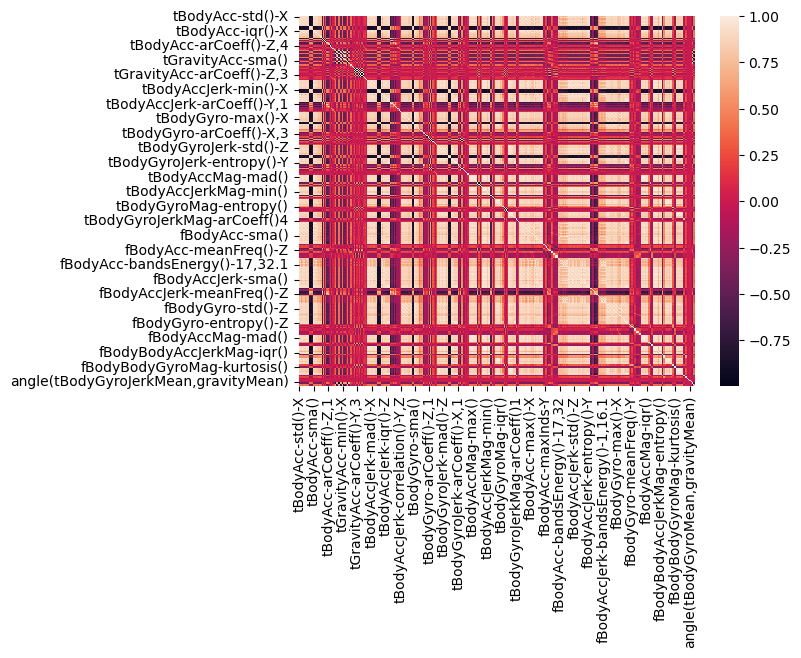

In [29]:
sns.heatmap(X_train.corr())

In [30]:
corr_matrix = X_train.corr()

In [31]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

1424


In [32]:
columns_to_drop = set(columns_to_drop)

In [33]:
len(columns_to_drop)

181

In [34]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [35]:
print(X_train.shape)
print(X_test.shape)

(2357, 148)
(590, 148)


In [36]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.983521,-0.987283,-0.990542,-0.567281,-0.818183,0.838812,0.683833,0.839742,-0.246162,-0.570960,...,-0.773985,0.270531,-0.455726,0.115116,-0.453583,0.605708,-0.680200,0.592883,-0.532547,-0.473327
1,-0.995295,-0.988179,-0.977193,-0.568844,-0.813556,0.850793,0.692082,0.833978,-0.654647,-0.610169,...,-0.484114,0.253203,-0.570589,0.011320,0.224079,0.009832,-0.336514,-0.579085,-0.124292,-0.175200
2,-0.200641,-0.047202,-0.371207,-0.079823,-0.305884,0.027481,0.031907,0.470138,0.582755,0.192128,...,-0.144686,0.070170,-0.289201,-0.078617,0.668608,0.931389,0.463493,-0.757358,0.260860,-0.023703
3,-0.178064,0.059195,-0.396999,-0.035256,-0.325810,0.186163,-0.020572,0.632963,0.318389,0.397213,...,-0.500010,0.201522,-0.414406,-0.099595,0.467438,0.741536,-0.934178,-0.754615,0.261956,-0.027107
4,-0.402532,-0.163684,-0.298333,-0.204556,-0.490535,0.463921,0.237109,0.249506,0.146022,0.197800,...,0.001090,0.180187,-0.730152,0.460438,0.845113,0.537182,0.679466,-0.569629,0.302829,0.235959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,-0.260440,-0.193546,-0.064250,-0.124033,-0.279017,0.318483,0.168707,0.144936,0.339343,0.236226,...,-0.523834,0.286318,-0.280561,-0.332066,-0.561590,0.945470,-0.928404,-0.718846,0.224618,0.170227
2353,-0.987217,-0.949080,-0.940076,-0.557023,-0.786531,0.835434,0.663531,0.815576,-0.528256,-0.671725,...,-0.296460,0.407022,-0.797020,0.031676,-0.180739,0.676657,-0.531927,-0.860490,0.186200,-0.023345
2354,-0.985394,-0.988332,-0.989880,-0.566965,-0.817338,0.839900,0.688257,0.842651,-0.170382,-0.707981,...,-0.766813,0.279598,-0.437664,-0.089646,0.086379,0.094172,-0.854682,0.549338,0.998808,-0.186375
2355,-0.224597,-0.270375,-0.228999,-0.193591,-0.318847,0.232535,0.130062,0.253204,0.454131,0.247429,...,-0.303264,0.136430,0.200476,-0.451643,0.527396,0.719527,0.314826,-0.873733,0.182817,0.040213


## 📈 Feature Selection — ANOVA (Analysis of Variance)

### 🔍 What is ANOVA?

**ANOVA (Analysis of Variance)** is a statistical method used to identify whether there are **significant differences between the means** of two or more groups. 

In the context of **feature selection**, ANOVA tests whether the **mean of a feature differs significantly between different target classes** (classification problems). If a feature varies significantly across classes, it's likely to be informative.

We typically use **One-Way ANOVA (f-test)** for **numeric features and categorical target variables** (e.g., class labels).

---

### 🎯 Why Use ANOVA for Feature Selection?

- To determine which features **contribute significantly to class separation**.
- To reduce dimensionality by **removing non-informative features**.
- To use a **statistical basis** for selecting features in classification tasks.

---

### ⚙️ How It Works

ANOVA calculates an **F-statistic** for each feature:

\[
F = \frac{\text{Between-group variance}}{\text{Within-group variance}}
\]

A **higher F-value** indicates that the feature is more likely to be significant.

#### Example (using `scikit-learn`):
```python
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
X, y = load_iris(return_X_y=True)

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# View selected feature indices
print(selector.get_support())


### ✅ Advantages of ANOVA for Feature Selection

1. **Statistically Sound**  
   ANOVA is based on hypothesis testing and provides a formal statistical method for identifying important features.

2. **Simple and Interpretable**  
   The F-statistic is easy to interpret: higher values indicate stronger discriminatory power between classes.

3. **Fast and Scalable**  
   ANOVA is computationally efficient and works well on large datasets with many features.

4. **Effective for Classification**  
   When assumptions are met, it performs well in selecting features for classification problems, especially with well-separated classes.

5. **Easily Available in Libraries**  
   Built-in support in tools like `scikit-learn` makes it easy to integrate into machine learning workflows.

---

### 🟥 Disadvantages of ANOVA for Feature Selection

1. **Assumes Normal Distribution**  
   ANOVA assumes that the features are normally distributed within each class. Violations can reduce reliability.

2. **Assumes Equal Variance**  
   The method assumes homogeneity of variances (same variance across groups). If not true, the results may be misleading.

3. **Not Suitable for Regression**  
   ANOVA is typically used for **classification** tasks. For regression, you'd need alternatives like F-regression.

4. **Ignores Feature Interactions**  
   ANOVA evaluates features **independently**, so it may miss interactions or combinations of features that are useful together.

5. **Sensitive to Outliers**  
   As a parametric test, ANOVA can be influenced by extreme values, which may skew results.

6. **Does Not Work for Categorical Features**  
   Features must be numeric. Categorical features must be encoded appropriately before applying ANOVA.



# 4. ANOVA

In [37]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


sel = SelectKBest(f_classif, k=100).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X',
       'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-arCoeff()-Y,1',
       'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Z,1',
       'tGravityAcc-arCoeff()-Z,2', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerk-arCoeff()-X,3', '

In [38]:
columns = X_train.columns[sel.get_support()]

In [39]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [40]:
print(X_train.shape)
print(X_test.shape)

(2357, 100)
(590, 100)


In [41]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,...,fBodyGyro-skewness()-Z,fBodyAccMag-maxInds,fBodyAccMag-meanFreq(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.983521,-0.987283,-0.990542,-0.567281,-0.818183,0.838812,0.683833,0.839742,-0.246162,-0.570960,...,-0.023194,-0.931034,0.428312,-0.980734,0.273268,-0.437775,0.098993,0.592883,-0.532547,-0.473327
1,-0.995295,-0.988179,-0.977193,-0.568844,-0.813556,0.850793,0.692082,0.833978,-0.654647,-0.610169,...,-0.660084,-0.793103,0.087832,-0.987091,0.395988,-0.696810,-0.060896,-0.579085,-0.124292,-0.175200
2,-0.200641,-0.047202,-0.371207,-0.079823,-0.305884,0.027481,0.031907,0.470138,0.582755,0.192128,...,0.053305,-0.448276,0.037276,-0.787920,0.319888,-0.617894,-0.194792,-0.757358,0.260860,-0.023703
3,-0.178064,0.059195,-0.396999,-0.035256,-0.325810,0.186163,-0.020572,0.632963,0.318389,0.397213,...,-0.033963,-0.517241,-0.076460,-0.558223,-0.123349,-0.249688,-0.072568,-0.754615,0.261956,-0.027107
4,-0.402532,-0.163684,-0.298333,-0.204556,-0.490535,0.463921,0.237109,0.249506,0.146022,0.197800,...,0.296043,-0.517241,-0.141628,-0.767134,0.133249,0.329761,-0.279997,-0.569629,0.302829,0.235959


- Moment of Truth

In [42]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.9813559322033898


## 🧪 Feature Selection — Chi-Square (χ²) Test

### 🔍 What is the Chi-Square Test?

The **Chi-Square (χ²) Test** is a statistical test used to measure the **association between two categorical variables**.

In feature selection, the Chi-Square test evaluates whether a **categorical feature** is **independent of the target variable**. A feature that is highly dependent on the target (i.e., associated with it) is likely to be more informative.

> ✅ Suitable for **classification problems** where both the feature and the target are **categorical**.

---

### 🎯 Why Use Chi-Square for Feature Selection?

- To assess whether a categorical input feature has a **significant relationship** with the class label.
- To identify features that contribute most to the **class separation**.
- To reduce the number of irrelevant or weakly related features in classification tasks.

---

### ⚙️ How It Works

Chi-square is calculated as:

\[
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
\]

Where:
- \(O_i\) = observed frequency
- \(E_i\) = expected frequency (assuming no association between feature and target)

The **higher the chi-square value**, the more likely that the feature and the target are dependent (i.e., related).

#### Example (using `scikit-learn`):
```python
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

# Load data
X, y = load_digits(return_X_y=True)

# Chi2 requires non-negative features → scale to [0,1]
X = MinMaxScaler().fit_transform(X)

# Apply chi2 test
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)

# View selected features
print(selector.get_support())


# 5. Chi-square Test¶

In [43]:
titanic = pd.read_csv(r"C:\Users\Asus\Downloads\titanic.csv")[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [44]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [45]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=np.float64(263.05057407065567), pvalue=np.float64(1.0036732821369117e-55), dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

In [46]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

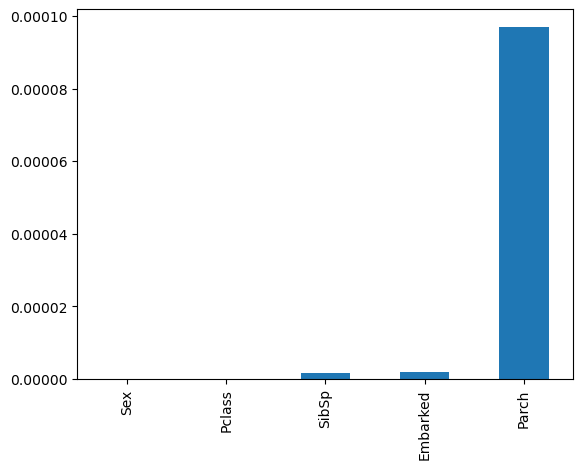

In [47]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

### second method using skl learn

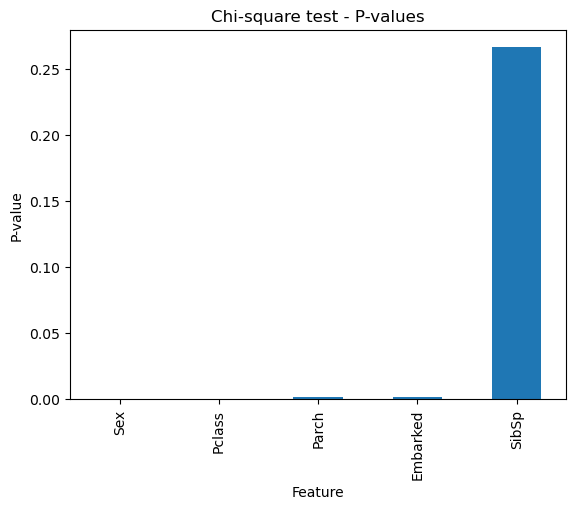

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()
